In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='pg4U9NNGLJPP4ezUuW9SGp5wAO7RZuSHazwbvh3d0xkB',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu-gb.cloud-object-storage.appdomain.cloud')

bucket = 'ibmhackathon-donotdelete-pr-nuodlc4fpae7nq'
object_key = 'train.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

train = pd.read_csv(body)




In [3]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='pg4U9NNGLJPP4ezUuW9SGp5wAO7RZuSHazwbvh3d0xkB',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu-gb.cloud-object-storage.appdomain.cloud')

bucket = 'ibmhackathon-donotdelete-pr-nuodlc4fpae7nq'
object_key = 'test.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

test = pd.read_csv(body)




In [4]:
train2=train.drop(['Date_of_creation','Contact_no','POC_name','Lead_POC_email','Internal_POC','Deal_title','Lead_name'],axis=1)
test2=test.drop(['Date_of_creation','Contact_no','POC_name','Lead_POC_email','Internal_POC','Deal_title','Lead_name'],axis=1)
test2["Success_probability"]=-25
print(train2.head())

                Industry Deal_value Weighted_amount      Pitch  \
0            Restaurants    320506$      2067263.7$  Product_2   
1  Construction Services     39488$       240876.8$  Product_2   
2      Hospitals/Clinics    359392$      2407926.4$  Product_1   
3            Real Estate     76774$       468321.4$  Product_2   
4     Financial Services    483896$             NaN  Product_2   

              Lead_revenue Fund_category Geography  \
0         50 - 100 Million    Category 2       USA   
1  500 Million - 1 Billion    Category 4     India   
2  500 Million - 1 Billion    Category 4       USA   
3  500 Million - 1 Billion    Category 3       USA   
4         50 - 100 Million    Category 3     India   

                      Location               Designation  \
0           Killeen-Temple, TX  Executive Vice President   
1                       Ratlam    Chairman/CEO/President   
2  Albany-Schenectady-Troy, NY      SVP/General Counsel    
3   Mount Vernon-Anacortes, WA   CEO/C

In [5]:
train2.isnull().sum()

Industry                   1
Deal_value                51
Weighted_amount          525
Pitch                      0
Lead_revenue               0
Fund_category              0
Geography                972
Location                  11
Designation                0
Hiring_candidate_role      0
Lead_source                0
Level_of_meeting           0
Last_lead_update         633
Resource                 149
Internal_rating            0
Success_probability        0
dtype: int64

In [6]:
train2 = train2.dropna(how='any', subset=['Industry','Resource','Deal_value','Location'], axis=0)
test2 = test2.dropna(how='any', subset=['Industry','Resource','Deal_value','Location'], axis=0)


In [7]:
#train2['Designation'].value_counts()
#print(train2['Designation'].value_counts())
train2['Designation'] = train2['Designation'].replace({'Chairman/CEO/President':'Chairman/CEO/President',
                                              'CEO/Chairman/President':'Chairman/CEO/President',
                                              'Chief Executive Officer':'CEO',
                                              'Vice President / GM (04-present) : VP Sales and Marketing (01-04)':'Vice President/GM'})

# test2['Designation'].value_counts()
# print(test2['Designation'].value_counts())
test2['Designation'] = test2['Designation'].replace({'Chairman/CEO/President':'Chairman/CEO/President',
                                            'CEO/Chairman/President':'Chairman/CEO/President',
                                            'Chief Executive Officer':'CEO',
                                            'Vice President / GM (04-present) : VP Sales and Marketing (01-04)':'Vice President/GM'})

In [8]:
train2['Last_lead_update'].replace('?','No track',inplace=True)
train2['Last_lead_update'].replace(np.nan,'No track',inplace=True)
test2['Last_lead_update'].replace('?','No track',inplace=True)
test2['Last_lead_update'].replace(np.nan,'No track',inplace=True)


In [9]:
train2['Geography'] = train2.apply(lambda row: 'USA' if pd.isna(row['Geography']) and ',' in row['Location'] else ('India' if pd.isna(row['Geography']) else row['Geography']),axis=1)
train2['Level_of_meeting'] = train2.apply(lambda row: 1 if '1' in row['Level_of_meeting'] else ( 2 if '2' in row['Level_of_meeting'] else 3),axis=1)
#train2
test2['Geography'] = test2.apply(lambda row: 'USA' if pd.isna(row['Geography']) and ',' in row['Location'] else ('India' if pd.isna(row['Geography']) else row['Geography']),axis=1)
test2['Level_of_meeting'] = test2.apply(lambda row: 1 if '1' in row['Level_of_meeting'] else ( 2 if '2' in row['Level_of_meeting'] else 3),axis=1)

In [10]:
train2['Deal_value'] = train2['Deal_value'].str.replace('$', '')
train2['Weighted_amount'] = train2['Weighted_amount'].str.replace('$', '')
train2['Weighted_amount'] = train2['Weighted_amount'].astype(float)
train2['Deal_value'] = train2['Deal_value'].astype(float)
train2['Weighted_amount'].fillna(train2['Weighted_amount'].mean(),inplace=True)

test2['Deal_value'] = test2['Deal_value'].str.replace('$', '')
test2['Weighted_amount'] = test2['Weighted_amount'].str.replace('$', '')
test2['Weighted_amount'] = test2['Weighted_amount'].astype(float)
test2['Deal_value'] = test2['Deal_value'].astype(float)
test2['Weighted_amount'].fillna(test2['Weighted_amount'].mean(),inplace=True)

/tmp/wsuser/ipykernel_166/1017856186.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train2['Deal_value'] = train2['Deal_value'].str.replace('$', '')
/tmp/wsuser/ipykernel_166/1017856186.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train2['Weighted_amount'] = train2['Weighted_amount'].str.replace('$', '')
/tmp/wsuser/ipykernel_166/1017856186.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test2['Deal_value'] = test2['Deal_value'].str.replace('$', '')
/tmp/wsuser/ipykernel_166/1017856186.py:8: FutureWarning

In [11]:
train2.isnull().sum()

Industry                 0
Deal_value               0
Weighted_amount          0
Pitch                    0
Lead_revenue             0
Fund_category            0
Geography                0
Location                 0
Designation              0
Hiring_candidate_role    0
Lead_source              0
Level_of_meeting         0
Last_lead_update         0
Resource                 0
Internal_rating          0
Success_probability      0
dtype: int64

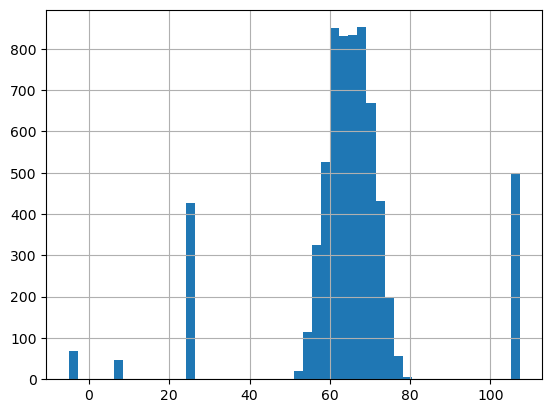

In [19]:
import matplotlib.pyplot as plt
# x1=train2['Weighted_amount']
# print(x1.value_counts())
# x1.hist(bins = 50, histtype='stepfilled')
# print(train2.head())
y1=train2['Success_probability']
y1.hist(bins = 50, histtype='stepfilled')
plt.show()


In [12]:

train2.drop('Location',axis=1,inplace=True)
test2.drop('Location',axis=1,inplace=True)

newdf=pd.concat([train2,test2])
print(newdf.shape)

newdf=pd.get_dummies(newdf,columns=['Industry','Pitch','Lead_revenue','Fund_category','Geography','Designation','Hiring_candidate_role','Lead_source','Last_lead_update','Resource'])

train2=newdf.iloc[:6797,:]
test2=newdf.iloc[6797:,:]
print(newdf.shape)

#train2=pd.get_dummies(train2,columns=['Industry','Pitch','Lead_revenue','Fund_category','Geography','Designation','Hiring_candidate_role','Lead_source','Last_lead_update','Resource','Level_of_meeting','Internal_rating'])
#test2=pd.get_dummies(test2,columns=['Industry','Pitch','Lead_revenue','Fund_category','Geography','Designation','Hiring_candidate_role','Lead_source','Last_lead_update','Resource','Level_of_meeting','Internal_rating'])


(8867, 15)
(8867, 855)


In [13]:
# Select only the numerical columns
numerical_columns = ['Deal_value','Weighted_amount']
# Function to remove outliers based on a threshold
def remove_outliers(df, columns, threshold=2):
    df_no_outliers = df.copy()
    for column in columns:
        mean = df[column].mean()
        std = df[column].std()
        lower_bound = mean - (threshold * std)
        upper_bound = mean + (threshold * std)
        df_no_outliers = df_no_outliers[(df_no_outliers[column] >= lower_bound) & (df_no_outliers[column] <= upper_bound)]
    return df_no_outliers

# Remove outliers from numerical columns
train2 = remove_outliers(train2, numerical_columns)
print(train2.shape)
#print(train2.describe())
#print(train2[["Success_probability"]].median())

(6755, 855)


In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
# Separate features (X) and target (y)
X = train2.drop('Success_probability',axis=1)
y = train2['Success_probability']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create a Random Forest Regressor
n_estimators = 100  # Number of trees in the forest
max_depth = None # Maximum depth of the individual trees
rf_regressor = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)

weights = np.where((y_train >= 60) & (y_train <= 80), 0.2, 0.8)
# Train the Random Forest Regressor
rf_regressor.fit(X_train, y_train, sample_weight = weights)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)
print(y_pred)
print(y_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")


[72.469  64.2374 57.88   ... 61.7125 52.0498 55.9375]
4806    107.34
6409     61.80
1278     59.10
3435     69.50
1342     71.10
         ...  
5727    107.34
5980     57.10
3081     64.20
4814     58.30
66       69.40
Name: Success_probability, Length: 2027, dtype: float64
Mean Squared Error: 327.36
R-squared: -0.06


In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
# Separate features (X) and target (y)
X = train2.drop('Success_probability',axis=1)
#print(X)
y = train2['Success_probability']
# print(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# Create a Random Forest Regressor
n_estimators = 100  # Number of trees in the forest
max_depth = None # Maximum depth of the individual trees
rf_regressor = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)

#weights = np.where((y_train >= 60) & (y_train <= 80), 0.2, 0.8)
# Train the Random Forest Regressor
rf_regressor.fit(X_train, y_train)#, sample_weight = weights)

testing=test2.drop('Success_probability',axis=1)
# Make predictions on the test set
y_pred = rf_regressor.predict(testing)
print(y_pred)
#print(y_test)

[57.232  63.2796 74.175  ... 70.2223 61.953  61.937 ]


In [16]:
print(testing.iloc[0:10,-5:])

   Resource_Deliverable  Resource_No  Resource_Not enough  \
0                     0            1                    0   
1                     0            0                    0   
2                     1            0                    0   
3                     0            1                    0   
4                     1            0                    0   
5                     0            0                    0   
6                     0            0                    0   
7                     0            0                    1   
8                     0            0                    0   
9                     0            1                    0   

   Resource_We have all the requirements  Resource_Yes  
0                                      0             0  
1                                      0             1  
2                                      0             0  
3                                      0             0  
4                                      0   